# Credit Risk Modeling – Feature Engineering & Modeling

This notebook is part of an end-to-end credit risk modeling project completed
during my Data Science Internship at HDFC Capital Advisors Ltd.

⚠️ Note: Due to data confidentiality, raw datasets are not included.
The notebook demonstrates methodology, feature engineering logic,
modeling approach, and evaluation techniques.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import warnings
warnings.filterwarnings('default')

In [23]:
pd.set_option('display.max_columns', 200)

In [24]:
pd.set_option('display.max_rows', 100000)

In [1]:
LOAD_DATA = False  # Set to True only in secure local environment

if LOAD_DATA:
    with open('./data/senior_ds_test/data/train/train_flag.csv', 'r') as f:
        df_flag = json.load(f)
else:
    df_flag = [] 

In [26]:
df_flag.head()

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0


In [27]:
df_flag.columns

Index(['uid', 'NAME_CONTRACT_TYPE', 'TARGET'], dtype='object')

In [28]:
df_flag['TARGET'].mean()

0.08055994460236511

## Flag Data Split

In [29]:
total_rows = len(df_flag)

# Calculate the size of each part
part_size = total_rows // 5
remainder = total_rows % 5

# Initialize a list to hold the parts
parts = []

# Split the dataset into 5 parts
start_idx = 0
for i in range(5):
    end_idx = start_idx + part_size + (1 if i < remainder else 0)  # Distribute remainder
    parts.append(df_flag.iloc[start_idx:end_idx])
    start_idx = end_idx

# Verify the split
flag1, flag2, flag3, flag4, flag5 = parts
for i, part in enumerate(parts):
    print(f"Flag {i+1} size: {part.shape}")

Flag 1 size: (52277, 3)
Flag 2 size: (52277, 3)
Flag 3 size: (52277, 3)
Flag 4 size: (52276, 3)
Flag 5 size: (52276, 3)


In [30]:
flag1.shape

(52277, 3)

In [31]:
flag1.nunique()

uid                   52277
NAME_CONTRACT_TYPE        2
TARGET                    2
dtype: int64

In [32]:
df_flag.shape

(261383, 3)

## LOAD ACCOUNTS AND ENQUIRY DATA

In [33]:
df_acc = pd.read_csv("/Users/aaniaadap/Desktop/HDFC Internship/df_acc.csv")

In [35]:
df_acc.shape

(222990, 90)

In [36]:
df_acc['uid'].nunique()

222990

In [37]:
df_enq = pd.read_csv("/Users/aaniaadap/Desktop/HDFC Internship/df_enq.csv")

In [38]:
df_enq.shape

(261383, 79)

## MERGED DATA

### FLAG 1

In [39]:
flag1['uid'].nunique()

52277

In [40]:
df1 = pd.merge(
    pd.merge(flag1, df_enq, on='uid', how='inner'),
    df_acc, on='uid', how='inner'
)

In [41]:


df1.shape

(44620, 170)

In [42]:
df1['uid'].nunique()

44620

In [ ]:
df1['uid'].value_counts()

In [44]:
df1.head()

uid NAME_CONTRACT_TYPE  TARGET  enqList_Avg_amount_enquired  \
0  XDA69787158         Cash loans       0                    135500.00   
1  BSE47789733         Cash loans       0                    144333.33   
2  NTJ92213825         Cash loans       0                    120500.00   
3  TCQ47571695         Cash loans       0                    148000.00   
4  FZI10689602         Cash loans       0                     85611.11   

   enqList_max_amount_enquired  enqList_min_amount_enquired  \
0                       166000                       105000   
1                       151000                       132000   
2                       167000                         8000   
3                       148000                       148000   
4                       182000                        10000   

   enqList_total_enquiries_per_customer  \
0                                     2   
1                                     3   
2                                     4   
3                                     1   
4                                    18   

   enqList_unique_enquiry_types_per_customer  \
0                                          2   
1                                          3   
2                                          3   
3                                          1   
4                                         10   

   enqList_Another type of loan_total_enquiries  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   enqList_Car loan_total_enquiries  \
0                                 0   
1                                 1   
2                                 0   
3                                 0   
4                                 0   

   enqList_Cash loan (non-earmarked)_total_enquiries  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  3   

   enqList_Cash loans_total_enquiries  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   3   

   enqList_Consumer credit_total_enquiries  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        3   

   enqList_Credit card_total_enquiries  \
0                                    0   
1                                    1   
2                                    0   
3                                    0   
4                                    2   

   enqList_Interbank credit_total_enquiries  \
0                                         0   
1                                         0   
2                                         2   
3                                         0   
4                                         2   

   enqList_Loan for business development_total_enquiries  \
0                                                  0       
1                                                  0       
2                                                  1       
3                                                  0       
4                                                  1       

   enqList_Loan for purchase of shares (margin lending)_total_enquiries  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                      

limit_output extension: Maximum message size of 10000 exceeded with 43461 characters

In [ ]:
df1[df1['uid']=='XDA69787158']

In [45]:
df1[df1.duplicated(subset='uid')].sort_values(by='uid')

,uid,NAME_CONTRACT_TYPE,TARGET,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,enqList_Credit card_total_enquiries,enqList_Interbank credit_total_enquiries,enqList_Loan for business development_total_enquiries,enqList_Loan for purchase of shares (margin lending)_total_enquiries,enqList_Loan for the purchase of equipment_total_enquiries,enqList_Loan for working capital replenishment_total_enquiries,enqList_Microloan_total_enquiries,enqList_Mobile operator loan_total_enquiries,enqList_Mortgage_total_enquiries,enqList_Real estate loan_total_enquiries,enqList_Revolving loans_total_enquiries,enqList_Unknown type of loan_total_enquiries,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_Another type of loan_mean_enquiry_amt,enqList_Car loan_mean_enquiry_amt,enqList_Cash loan (non-earmarked)_mean_enquiry_amt,enqList_Cash loans_mean_enquiry_amt,enqList_Consumer credit_mean_enquiry_amt,enqList_Credit card_mean_enquiry_amt,enqList_Interbank credit_mean_enquiry_amt,enqList_Loan for business development_mean_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_mean_enquiry_amt,enqList_Loan for the purchase of equipment_mean_enquiry_amt,enqList_Loan for working capital replenishment_mean_enquiry_amt,enqList_Microloan_mean_enquiry_amt,enqList_Mobile operator loan_mean_enquiry_amt,enqList_Mortgage_mean_enquiry_amt,enqList_Real estate loan_mean_enquiry_amt,enqList_Revolving loans_mean_enquiry_amt,enqList_Unknown type of loan_mean_enquiry_amt,enqList_Another type of loan_median_enquiry_amt,enqList_Car loan_median_enquiry_amt,enqList_Cash loan (non-earmarked)_median_enquiry_amt,enqList_Cash loans_median_enquiry_amt,enqList_Consumer credit_median_enquiry_amt,enqList_Credit card_median_enquiry_amt,enqList_Interbank credit_median_enquiry_amt,enqList_Loan for business development_median_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_median_enquiry_amt,enqList_Loan for the purchase of equipment_median_enquiry_amt,enqList_Loan for working capital replenishment_median_enquiry_amt,enqList_Microloan_median_enquiry_amt,enqList_Mobile operator loan_median_enquiry_amt,enqList_Mortgage_median_enquiry_amt,enqList_Real estate loan_median_enquiry_amt,enqList_Revolving loans_median_enquiry_amt,enqList_Unknown type of loan_median_enquiry_amt,enqList_Another type of loan_total_enquiry_amt,enqList_Car loan_total_enquiry_amt,enqList_Cash loan (non-earmarked)_total_enquiry_amt,enqList_Cash loans_total_enquiry_amt,enqList_Consumer credit_total_enquiry_amt,enqList_Credit card_total_enquiry_amt,enqList_Interbank credit_total_enquiry_amt,enqList_Loan for business development_total_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_total_enquiry_amt,enqList_Loan for the purchase of equipment_total_enquiry_amt,enqList_Loan for working capital replenishment_total_enquiry_amt,enqList_Microloan_total_enquiry_amt,enqList_Mobile operator loan_total_enquiry_amt,enqList_Mortgage_total_enquiry_amt,enqList_Real estate loan_total_enquiry_amt,enqList_Revolving loans_total_enquiry_amt,enqList_Unknown type of loan_total_enquiry_amt,accList_mean_duration_months,accList_total_duration_months,accList_min_duration_months,accList_max_duration_months,accList_earliest_acc_year,accList_earliest_acc_month,accList_earliest_acc_day,accList_latest_acc_year,accList_latest_acc_month,accList_latest_acc_day,accList_avg_loan_amount,accList_median_loan_amount,accList_max_loan_amt,accList_min_loan_amt,accList_avg_overdues,accList_max_overdues,accList_min_overdues,accList_avg_ontime_payments,accList_max_ontime_payments,accList_min_ontime_p

In [46]:
df1.shape

(44620, 170)

### FLAG 2

In [47]:
df2 = pd.merge(
    pd.merge(flag2, df_enq, on='uid', how='inner'),
    df_acc, on='uid', how='inner'
)

In [48]:
df2.shape

(44494, 170)

In [49]:
df2['uid'].nunique()

44494

In [ ]:
df2['uid'].value_counts()

In [51]:
df2.head()

uid NAME_CONTRACT_TYPE  TARGET  enqList_Avg_amount_enquired  \
0  JNW59353954         Cash loans       0                     76857.14   
1  FBQ34422864         Cash loans       0                    125500.00   
2  GZV24786363         Cash loans       0                    142666.67   
3  ZUW72534540         Cash loans       0                     33000.00   
4  IBY70079587         Cash loans       0                     89666.67   

   enqList_max_amount_enquired  enqList_min_amount_enquired  \
0                       176000                         7000   
1                       147000                       104000   
2                       199000                        42000   
3                        33000                        33000   
4                       150000                        10000   

   enqList_total_enquiries_per_customer  \
0                                    14   
1                                     2   
2                                     9   
3                                     1   
4                                     3   

   enqList_unique_enquiry_types_per_customer  \
0                                         10   
1                                          2   
2                                          8   
3                                          1   
4                                          3   

   enqList_Another type of loan_total_enquiries  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

   enqList_Car loan_total_enquiries  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   enqList_Cash loan (non-earmarked)_total_enquiries  \
0                                                  1   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  0   

   enqList_Cash loans_total_enquiries  \
0                                   1   
1                                   0   
2                                   2   
3                                   0   
4                                   0   

   enqList_Consumer credit_total_enquiries  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   enqList_Credit card_total_enquiries  \
0                                    0   
1                                    0   
2                                    1   
3                                    0   
4                                    1   

   enqList_Interbank credit_total_enquiries  \
0                                         1   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   enqList_Loan for business development_total_enquiries  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   enqList_Loan for purchase of shares (margin lending)_total_enquiries  \
0                                                  1                      
1                                                  0                      
2                                                  0                      
3                                      

limit_output extension: Maximum message size of 10000 exceeded with 43461 characters

In [52]:
df2[df2.duplicated(subset='uid')].sort_values(by='uid')

,uid,NAME_CONTRACT_TYPE,TARGET,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,enqList_Credit card_total_enquiries,enqList_Interbank credit_total_enquiries,enqList_Loan for business development_total_enquiries,enqList_Loan for purchase of shares (margin lending)_total_enquiries,enqList_Loan for the purchase of equipment_total_enquiries,enqList_Loan for working capital replenishment_total_enquiries,enqList_Microloan_total_enquiries,enqList_Mobile operator loan_total_enquiries,enqList_Mortgage_total_enquiries,enqList_Real estate loan_total_enquiries,enqList_Revolving loans_total_enquiries,enqList_Unknown type of loan_total_enquiries,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_Another type of loan_mean_enquiry_amt,enqList_Car loan_mean_enquiry_amt,enqList_Cash loan (non-earmarked)_mean_enquiry_amt,enqList_Cash loans_mean_enquiry_amt,enqList_Consumer credit_mean_enquiry_amt,enqList_Credit card_mean_enquiry_amt,enqList_Interbank credit_mean_enquiry_amt,enqList_Loan for business development_mean_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_mean_enquiry_amt,enqList_Loan for the purchase of equipment_mean_enquiry_amt,enqList_Loan for working capital replenishment_mean_enquiry_amt,enqList_Microloan_mean_enquiry_amt,enqList_Mobile operator loan_mean_enquiry_amt,enqList_Mortgage_mean_enquiry_amt,enqList_Real estate loan_mean_enquiry_amt,enqList_Revolving loans_mean_enquiry_amt,enqList_Unknown type of loan_mean_enquiry_amt,enqList_Another type of loan_median_enquiry_amt,enqList_Car loan_median_enquiry_amt,enqList_Cash loan (non-earmarked)_median_enquiry_amt,enqList_Cash loans_median_enquiry_amt,enqList_Consumer credit_median_enquiry_amt,enqList_Credit card_median_enquiry_amt,enqList_Interbank credit_median_enquiry_amt,enqList_Loan for business development_median_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_median_enquiry_amt,enqList_Loan for the purchase of equipment_median_enquiry_amt,enqList_Loan for working capital replenishment_median_enquiry_amt,enqList_Microloan_median_enquiry_amt,enqList_Mobile operator loan_median_enquiry_amt,enqList_Mortgage_median_enquiry_amt,enqList_Real estate loan_median_enquiry_amt,enqList_Revolving loans_median_enquiry_amt,enqList_Unknown type of loan_median_enquiry_amt,enqList_Another type of loan_total_enquiry_amt,enqList_Car loan_total_enquiry_amt,enqList_Cash loan (non-earmarked)_total_enquiry_amt,enqList_Cash loans_total_enquiry_amt,enqList_Consumer credit_total_enquiry_amt,enqList_Credit card_total_enquiry_amt,enqList_Interbank credit_total_enquiry_amt,enqList_Loan for business development_total_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_total_enquiry_amt,enqList_Loan for the purchase of equipment_total_enquiry_amt,enqList_Loan for working capital replenishment_total_enquiry_amt,enqList_Microloan_total_enquiry_amt,enqList_Mobile operator loan_total_enquiry_amt,enqList_Mortgage_total_enquiry_amt,enqList_Real estate loan_total_enquiry_amt,enqList_Revolving loans_total_enquiry_amt,enqList_Unknown type of loan_total_enquiry_amt,accList_mean_duration_months,accList_total_duration_months,accList_min_duration_months,accList_max_duration_months,accList_earliest_acc_year,accList_earliest_acc_month,accList_earliest_acc_day,accList_latest_acc_year,accList_latest_acc_month,accList_latest_acc_day,accList_avg_loan_amount,accList_median_loan_amount,accList_max_loan_amt,accList_min_loan_amt,accList_avg_overdues,accList_max_overdues,accList_min_overdues,accList_avg_ontime_payments,accList_max_ontime_payments,accList_min_ontime_p

In [53]:
df2.shape

(44494, 170)

### FLAG 3

In [54]:
df3 = pd.merge(
    pd.merge(flag3, df_enq, on='uid', how='inner'),
    df_acc, on='uid', how='inner'
)

In [55]:
df3.shape

(44618, 170)

In [56]:
df3['uid'].nunique()

44618

In [57]:
df3['uid'].value_counts()

uid
FIT67079511    1
ECC25605877    1
MRL99569330    1
SBR65595995    1
ENP52794347    1
ZPE13576625    1
MCB54011907    1
SNY50093074    1
NCY69904605    1
GOW31038799    1
IRZ26485785    1
WNT46995070    1
AXT84202739    1
EOW54198305    1
CZY41395254    1
YNK85795451    1
TVI60912597    1
ONE52864023    1
SJI23400435    1
YUQ14454286    1
UTD04043505    1
QEN06835105    1
LBY72720929    1
DDY05578198    1
AEW08253489    1
IVW05081782    1
KVH61691991    1
HEX57814618    1
EXF77572623    1
JED94468186    1
ULN83968942    1
YSV67188680    1
IVJ97541029    1
ZAP81376723    1
BZH24782504    1
DBY15824527    1
WZT10479246    1
IEO36819412    1
JKU25485432    1
VYG03703547    1
URR85466136    1
VCO10131453    1
LUE63622003    1
XED93004613    1
IOY78586379    1
CPW93016126    1
PTH62534232    1
CQF06819002    1
ZVC58050504    1
LFG08782219    1
UZJ51508342    1
FSF25653515    1
BAY81331900    1
JCI15679546    1
WGO06040068    1
YUP64045497    1
NHI68373037    1
QQZ20365254    1
XXE3597896

limit_output extension: Maximum message size of 10000 exceeded with 758535 characters

In [58]:
df3[df3.duplicated(subset='uid')].sort_values(by='uid')


,uid,NAME_CONTRACT_TYPE,TARGET,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,enqList_Credit card_total_enquiries,enqList_Interbank credit_total_enquiries,enqList_Loan for business development_total_enquiries,enqList_Loan for purchase of shares (margin lending)_total_enquiries,enqList_Loan for the purchase of equipment_total_enquiries,enqList_Loan for working capital replenishment_total_enquiries,enqList_Microloan_total_enquiries,enqList_Mobile operator loan_total_enquiries,enqList_Mortgage_total_enquiries,enqList_Real estate loan_total_enquiries,enqList_Revolving loans_total_enquiries,enqList_Unknown type of loan_total_enquiries,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_Another type of loan_mean_enquiry_amt,enqList_Car loan_mean_enquiry_amt,enqList_Cash loan (non-earmarked)_mean_enquiry_amt,enqList_Cash loans_mean_enquiry_amt,enqList_Consumer credit_mean_enquiry_amt,enqList_Credit card_mean_enquiry_amt,enqList_Interbank credit_mean_enquiry_amt,enqList_Loan for business development_mean_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_mean_enquiry_amt,enqList_Loan for the purchase of equipment_mean_enquiry_amt,enqList_Loan for working capital replenishment_mean_enquiry_amt,enqList_Microloan_mean_enquiry_amt,enqList_Mobile operator loan_mean_enquiry_amt,enqList_Mortgage_mean_enquiry_amt,enqList_Real estate loan_mean_enquiry_amt,enqList_Revolving loans_mean_enquiry_amt,enqList_Unknown type of loan_mean_enquiry_amt,enqList_Another type of loan_median_enquiry_amt,enqList_Car loan_median_enquiry_amt,enqList_Cash loan (non-earmarked)_median_enquiry_amt,enqList_Cash loans_median_enquiry_amt,enqList_Consumer credit_median_enquiry_amt,enqList_Credit card_median_enquiry_amt,enqList_Interbank credit_median_enquiry_amt,enqList_Loan for business development_median_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_median_enquiry_amt,enqList_Loan for the purchase of equipment_median_enquiry_amt,enqList_Loan for working capital replenishment_median_enquiry_amt,enqList_Microloan_median_enquiry_amt,enqList_Mobile operator loan_median_enquiry_amt,enqList_Mortgage_median_enquiry_amt,enqList_Real estate loan_median_enquiry_amt,enqList_Revolving loans_median_enquiry_amt,enqList_Unknown type of loan_median_enquiry_amt,enqList_Another type of loan_total_enquiry_amt,enqList_Car loan_total_enquiry_amt,enqList_Cash loan (non-earmarked)_total_enquiry_amt,enqList_Cash loans_total_enquiry_amt,enqList_Consumer credit_total_enquiry_amt,enqList_Credit card_total_enquiry_amt,enqList_Interbank credit_total_enquiry_amt,enqList_Loan for business development_total_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_total_enquiry_amt,enqList_Loan for the purchase of equipment_total_enquiry_amt,enqList_Loan for working capital replenishment_total_enquiry_amt,enqList_Microloan_total_enquiry_amt,enqList_Mobile operator loan_total_enquiry_amt,enqList_Mortgage_total_enquiry_amt,enqList_Real estate loan_total_enquiry_amt,enqList_Revolving loans_total_enquiry_amt,enqList_Unknown type of loan_total_enquiry_amt,accList_mean_duration_months,accList_total_duration_months,accList_min_duration_months,accList_max_duration_months,accList_earliest_acc_year,accList_earliest_acc_month,accList_earliest_acc_day,accList_latest_acc_year,accList_latest_acc_month,accList_latest_acc_day,accList_avg_loan_amount,accList_median_loan_amount,accList_max_loan_amt,accList_min_loan_amt,accList_avg_overdues,accList_max_overdues,accList_min_overdues,accList_avg_ontime_payments,accList_max_ontime_payments,accList_min_ontime_p

In [59]:
df3.shape

(44618, 170)

### FLAG 4

In [60]:
df4 = pd.merge(
    pd.merge(flag4, df_enq, on='uid', how='inner'),
    df_acc, on='uid', how='inner'
)

In [ ]:
df4.shape

In [61]:
df4['uid'].nunique()

44737

In [62]:
df4.shape

(44737, 170)

### FLAG 5

In [63]:
df5 = pd.merge(
    pd.merge(flag5, df_enq, on='uid', how='inner'),
    df_acc, on='uid', how='inner'
)

In [64]:
df5.shape

(44521, 170)

In [65]:
df5['uid'].nunique()

44521

In [66]:
df5[df5.duplicated(subset='uid')].sort_values(by='uid')

,uid,NAME_CONTRACT_TYPE,TARGET,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,enqList_Credit card_total_enquiries,enqList_Interbank credit_total_enquiries,enqList_Loan for business development_total_enquiries,enqList_Loan for purchase of shares (margin lending)_total_enquiries,enqList_Loan for the purchase of equipment_total_enquiries,enqList_Loan for working capital replenishment_total_enquiries,enqList_Microloan_total_enquiries,enqList_Mobile operator loan_total_enquiries,enqList_Mortgage_total_enquiries,enqList_Real estate loan_total_enquiries,enqList_Revolving loans_total_enquiries,enqList_Unknown type of loan_total_enquiries,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_Another type of loan_mean_enquiry_amt,enqList_Car loan_mean_enquiry_amt,enqList_Cash loan (non-earmarked)_mean_enquiry_amt,enqList_Cash loans_mean_enquiry_amt,enqList_Consumer credit_mean_enquiry_amt,enqList_Credit card_mean_enquiry_amt,enqList_Interbank credit_mean_enquiry_amt,enqList_Loan for business development_mean_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_mean_enquiry_amt,enqList_Loan for the purchase of equipment_mean_enquiry_amt,enqList_Loan for working capital replenishment_mean_enquiry_amt,enqList_Microloan_mean_enquiry_amt,enqList_Mobile operator loan_mean_enquiry_amt,enqList_Mortgage_mean_enquiry_amt,enqList_Real estate loan_mean_enquiry_amt,enqList_Revolving loans_mean_enquiry_amt,enqList_Unknown type of loan_mean_enquiry_amt,enqList_Another type of loan_median_enquiry_amt,enqList_Car loan_median_enquiry_amt,enqList_Cash loan (non-earmarked)_median_enquiry_amt,enqList_Cash loans_median_enquiry_amt,enqList_Consumer credit_median_enquiry_amt,enqList_Credit card_median_enquiry_amt,enqList_Interbank credit_median_enquiry_amt,enqList_Loan for business development_median_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_median_enquiry_amt,enqList_Loan for the purchase of equipment_median_enquiry_amt,enqList_Loan for working capital replenishment_median_enquiry_amt,enqList_Microloan_median_enquiry_amt,enqList_Mobile operator loan_median_enquiry_amt,enqList_Mortgage_median_enquiry_amt,enqList_Real estate loan_median_enquiry_amt,enqList_Revolving loans_median_enquiry_amt,enqList_Unknown type of loan_median_enquiry_amt,enqList_Another type of loan_total_enquiry_amt,enqList_Car loan_total_enquiry_amt,enqList_Cash loan (non-earmarked)_total_enquiry_amt,enqList_Cash loans_total_enquiry_amt,enqList_Consumer credit_total_enquiry_amt,enqList_Credit card_total_enquiry_amt,enqList_Interbank credit_total_enquiry_amt,enqList_Loan for business development_total_enquiry_amt,enqList_Loan for purchase of shares (margin lending)_total_enquiry_amt,enqList_Loan for the purchase of equipment_total_enquiry_amt,enqList_Loan for working capital replenishment_total_enquiry_amt,enqList_Microloan_total_enquiry_amt,enqList_Mobile operator loan_total_enquiry_amt,enqList_Mortgage_total_enquiry_amt,enqList_Real estate loan_total_enquiry_amt,enqList_Revolving loans_total_enquiry_amt,enqList_Unknown type of loan_total_enquiry_amt,accList_mean_duration_months,accList_total_duration_months,accList_min_duration_months,accList_max_duration_months,accList_earliest_acc_year,accList_earliest_acc_month,accList_earliest_acc_day,accList_latest_acc_year,accList_latest_acc_month,accList_latest_acc_day,accList_avg_loan_amount,accList_median_loan_amount,accList_max_loan_amt,accList_min_loan_amt,accList_avg_overdues,accList_max_overdues,accList_min_overdues,accList_avg_ontime_payments,accList_max_ontime_payments,accList_min_ontime_p

In [67]:
df5.shape

(44521, 170)

In [68]:
df5.head()

uid NAME_CONTRACT_TYPE  TARGET  enqList_Avg_amount_enquired  \
0  FOD84563320         Cash loans       1                     77333.33   
1  AKW00762959         Cash loans       0                    136500.00   
2  KHG87986117         Cash loans       0                      6000.00   
3  LGM11728920         Cash loans       0                     80000.00   
4  TFP97707886         Cash loans       0                    119400.00   

   enqList_max_amount_enquired  enqList_min_amount_enquired  \
0                       121000                        11000   
1                       198000                        30000   
2                         6000                         6000   
3                       180000                        34000   
4                       186000                        27000   

   enqList_total_enquiries_per_customer  \
0                                     3   
1                                     4   
2                                     1   
3                                     6   
4                                     5   

   enqList_unique_enquiry_types_per_customer  \
0                                          3   
1                                          4   
2                                          1   
3                                          5   
4                                          4   

   enqList_Another type of loan_total_enquiries  \
0                                             0   
1                                             0   
2                                             0   
3                                             1   
4                                             1   

   enqList_Car loan_total_enquiries  \
0                                 1   
1                                 1   
2                                 0   
3                                 0   
4                                 0   

   enqList_Cash loan (non-earmarked)_total_enquiries  \
0                                                  0   
1                                                  1   
2                                                  0   
3                                                  0   
4                                                  0   

   enqList_Cash loans_total_enquiries  \
0                                   1   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   enqList_Consumer credit_total_enquiries  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   enqList_Credit card_total_enquiries  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   enqList_Interbank credit_total_enquiries  \
0                                         1   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   enqList_Loan for business development_total_enquiries  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   enqList_Loan for purchase of shares (margin lending)_total_enquiries  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                      

limit_output extension: Maximum message size of 10000 exceeded with 43461 characters

## MERGED DATASET

In [69]:
df = pd.concat([df1,df2,df3,df4,df5])

In [70]:
df.shape

(222990, 170)

In [71]:
uids_flags = set(df_flag['uid'])
uids_df = set(df['uid'])

In [72]:
missing_uids = uids_flags-uids_df

In [73]:
len(missing_uids)

38393

In [74]:
df.columns

Index(['uid', 'NAME_CONTRACT_TYPE', 'TARGET', 'enqList_Avg_amount_enquired',
       'enqList_max_amount_enquired', 'enqList_min_amount_enquired',
       'enqList_total_enquiries_per_customer',
       'enqList_unique_enquiry_types_per_customer',
       'enqList_Another type of loan_total_enquiries',
       'enqList_Car loan_total_enquiries',
       ...
       'accList_Loan for purchase of shares (margin lending)_total_loan',
       'accList_Loan for the purchase of equipment_total_loan',
       'accList_Loan for working capital replenishment_total_loan',
       'accList_Microloan_total_loan',
       'accList_Mobile operator loan_total_loan',
       'accList_Mortgage_total_loan', 'accList_Real estate loan_total_loan',
       'accList_Unknown type of loan_total_loan', 'accList_loan_status',
       'accList_most_frequent_credit_type'],
      dtype='object', length=170)

In [75]:
user_dict = df[df["uid"]=='AAA09044550'].to_dict('records')

In [76]:
user_dict

[{'uid': 'AAA09044550',
  'NAME_CONTRACT_TYPE': 'Cash loans',
  'TARGET': 0,
  'enqList_Avg_amount_enquired': 102269.23,
  'enqList_max_amount_enquired': 197000,
  'enqList_min_amount_enquired': 5000,
  'enqList_total_enquiries_per_customer': 26,
  'enqList_unique_enquiry_types_per_customer': 14,
  'enqList_Another type of loan_total_enquiries': 3,
  'enqList_Car loan_total_enquiries': 3,
  'enqList_Cash loan (non-earmarked)_total_enquiries': 1,
  'enqList_Cash loans_total_enquiries': 7,
  'enqList_Consumer credit_total_enquiries': 1,
  'enqList_Credit card_total_enquiries': 1,
  'enqList_Interbank credit_total_enquiries': 2,
  'enqList_Loan for business development_total_enquiries': 0,
  'enqList_Loan for purchase of shares (margin lending)_total_enquiries': 0,
  'enqList_Loan for the purchase of equipment_total_enquiries': 1,
  'enqList_Loan for working capital replenishment_total_enquiries': 0,
  'enqList_Microloan_total_enquiries': 2,
  'enqList_Mobile operator loan_total_enquiries

In [77]:
df.to_csv("df_train.csv",index=False)

## Threshold

In [79]:
threshold = 0.95

# Calculate percentage of NaNs
nan_percentage = df.isna().mean()

# Calculate percentage of zeros (excluding NaNs)
zero_percentage = (df == 0).sum() / df.shape[0]

# Calculate percentage of unique values
unique_percentage =  (df.nunique() / df.count())

# Identify columns with more than 95% NaNs, 0s, or unique values
columns_with_high_nan = nan_percentage[nan_percentage > threshold].index.tolist()
columns_with_high_zeros = zero_percentage[zero_percentage > threshold].index.tolist()
columns_with_high_unique = unique_percentage[unique_percentage > threshold].index.tolist()

print("Columns with more than 95% NaNs:", columns_with_high_nan)
print()
print("Columns with more than 95% zeros:", columns_with_high_zeros)
print()
print("Columns with more than 95% unique values:", columns_with_high_unique)

Columns with more than 95% NaNs: []

Columns with more than 95% zeros: ['accList_avg_overdues', 'accList_max_overdues', 'accList_min_overdues', 'accList_min_late_payments', 'accList_median_del_payments', 'accList_min_del_payments', 'accList_median_DPD', 'accList_min_DPD', 'accList_Another type of loan_mean_loan', 'accList_Cash loan (non-earmarked)_mean_loan', 'accList_Interbank credit_mean_loan', 'accList_Loan for business development_mean_loan', 'accList_Loan for purchase of shares (margin lending)_mean_loan', 'accList_Loan for the purchase of equipment_mean_loan', 'accList_Loan for working capital replenishment_mean_loan', 'accList_Microloan_mean_loan', 'accList_Mobile operator loan_mean_loan', 'accList_Real estate loan_mean_loan', 'accList_Unknown type of loan_mean_loan', 'accList_Another type of loan_median_loan', 'accList_Cash loan (non-earmarked)_median_loan', 'accList_Interbank credit_median_loan', 'accList_Loan for business development_median_loan', 'accList_Loan for purchase o

In [80]:
threshold = 0.20

# Calculate percentage of NaNs
nan_percentage = df.isna().mean()

# Calculate percentage of zeros (excluding NaNs)
zero_percentage = (df == 0).sum() / df.shape[0]

# Calculate percentage of unique values
unique_percentage =  (df.nunique() / df.count())

# Identify columns with more than 95% NaNs, 0s, or unique values
columns_with_high_nan = nan_percentage[nan_percentage > threshold].index.tolist()
columns_with_high_zeros = zero_percentage[zero_percentage > threshold].index.tolist()
columns_with_less_than_20_percent_unique = unique_percentage[unique_percentage > threshold].index.tolist()

print("Columns with less than 20% NaNs:", columns_with_high_nan)
print()
print("Columns with less than 20% zeros:", columns_with_high_zeros)
print()
print("Columns with less than 20% unique values:", columns_with_less_than_20_percent_unique)

Columns with less than 20% NaNs: []

Columns with less than 20% zeros: ['TARGET', 'enqList_Another type of loan_total_enquiries', 'enqList_Car loan_total_enquiries', 'enqList_Cash loan (non-earmarked)_total_enquiries', 'enqList_Cash loans_total_enquiries', 'enqList_Consumer credit_total_enquiries', 'enqList_Credit card_total_enquiries', 'enqList_Interbank credit_total_enquiries', 'enqList_Loan for business development_total_enquiries', 'enqList_Loan for purchase of shares (margin lending)_total_enquiries', 'enqList_Loan for the purchase of equipment_total_enquiries', 'enqList_Loan for working capital replenishment_total_enquiries', 'enqList_Microloan_total_enquiries', 'enqList_Mobile operator loan_total_enquiries', 'enqList_Mortgage_total_enquiries', 'enqList_Real estate loan_total_enquiries', 'enqList_Revolving loans_total_enquiries', 'enqList_Unknown type of loan_total_enquiries', 'enqList_enquiries_last_1_month', 'enqList_enquiries_last_3_months', 'enqList_Another type of loan_mean_

In [81]:
len(columns_with_high_zeros)

134

In [82]:
df.shape

(222990, 170)

In [83]:
columns = [
    'NAME_CONTRACT_TYPE',
    'accList_avg_overdues', 
    'accList_max_overdues', 
    'accList_min_overdues', 
    'accList_min_late_payments', 
    'accList_median_del_payments', 
    'accList_min_del_payments', 
    'accList_median_DPD', 
    'accList_min_DPD'
]

df = df.drop(columns = columns)

In [84]:
df.shape

(222990, 161)

In [85]:
columns_with_less_than_20_percent_unique

['uid',
 'accList_avg_loan_amount',
 'accList_median_loan_amount',
 'accList_max_loan_amt',
 'accList_min_loan_amt',
 'accList_Consumer credit_mean_loan',
 'accList_Consumer credit_median_loan',
 'accList_Consumer credit_total_loan']

In [86]:
"""num_rows = len(df)
for column in columns_with_less_than_20_percent_unique:
    if column in df.columns:
        df[column] = df[column].astype('category')
    else:
        print(f"Column '{column}' does not exist in the DataFrame.")
        """

'num_rows = len(df)\nfor column in columns_with_less_than_20_percent_unique:\n    if column in df.columns:\n        df[column] = df[column].astype(\'category\')\n    else:\n        print(f"Column \'{column}\' does not exist in the DataFrame.")\n        '

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222990 entries, 0 to 44520
Columns: 161 entries, uid to accList_most_frequent_credit_type
dtypes: float64(104), int64(54), object(3)
memory usage: 275.6+ MB


In [88]:
df.to_csv("df_train.csv",index=False)

## EDA

### Target

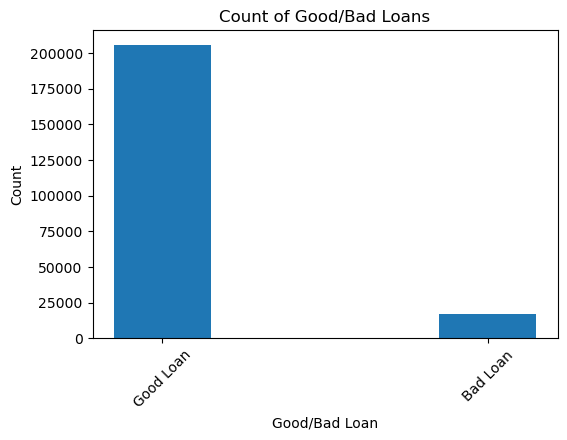

In [89]:
target = df["TARGET"].value_counts().head(10)
plt.figure(figsize=(6,4))
plt.bar(target.index, target.values,width=0.3)
plt.xticks([0, 1], ['Good Loan', 'Bad Loan'],rotation=45)
plt.xlabel('Good/Bad Loan')
plt.ylabel('Count')
plt.title('Count of Good/Bad Loans')
plt.show()

In [90]:
enq_type_counts = df["enqList_enquiry_type"].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(enq_type_counts.index, enq_type_counts.values,width=0.3)
plt.xticks(rotation=45)
plt.xlabel('Enquiry Type')
plt.ylabel('Count')
plt.title('Count of Entries for Each Enquiry Type')
plt.show()

KeyError: 'enqList_enquiry_type'

In [91]:
plt.figure(figsize=(6, 4))
sns.barplot(x='NAME_CONTRACT_TYPE', y='enqList_enquiry_amt', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Contract Type')
plt.show()

ValueError: Could not interpret input 'NAME_CONTRACT_TYPE'

<Figure size 600x400 with 0 Axes>

In [ ]:
df_copy = df.copy()

In [ ]:
bins = [0, 100000, 500000, 1000000, 5000000, 10000000]

labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M','5M-10M']

df_copy['enqList_enquiry_amt_category'] = pd.cut(df_copy['enqList_enquiry_amt'], bins=bins, labels=labels)

In [ ]:
#
category = df_copy["enqList_enquiry_amt_category"].value_counts()
sns.countplot(x='enqList_enquiry_amt_category', data=df_copy, palette='coolwarm')
plt.xlabel('Enquiry Amount Category')
plt.ylabel('Count')
plt.title('Distribution of Enquiry Data.ipynb Amounts by Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['enqList_enquiries_last_3_months'], bins=30, kde=True)
plt.xlabel('Number of Enquiries in the Last 3 Months')
plt.ylabel('Frequency')
plt.title('Distribution of Enquiries in the Last 3 Months')
plt.show()

In [ ]:
Chris